# Parkisons Disease Detection using Machine Learning

In [20]:
# Importing Libraries
import numpy as np
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier

from IPython.display import display

# Data Collection


---


**Dataset Used :** Parkinsons Disease Dataset <br>
**Dataset Source :** UCI Machine Learning Repository <br>
**Dataset Hosting URL :** https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data <br>

In [21]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

# Data Preprocessing


---
 The following steps are performed on the dataset in this section:
 + Dropping Redudant Columns
 + Checking For Duplicated Rows
 + Checking For Missing Values

In [22]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [23]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [24]:
print('Number of Features In Dataset (columns) :', df.shape[1])
print('Number of Instances In Dataset (rows):', df.shape[0])

Number of Features In Dataset (columns) : 24
Number of Instances In Dataset (rows): 195


The column **name**, is a *Redundant* column which is not useful for Analysis or Machine Learning, and will be dropped from the dataframe.

In [25]:
df.drop(['name'], axis=1, inplace=True)

In [26]:
print('Number of Features In Dataset (columns) :', df.shape[1])
print('Number of Instances In Dataset (rows) : ', df.shape[0])

Number of Features In Dataset (columns) : 23
Number of Instances In Dataset (rows) :  195


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [28]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [78]:
m=df.groupby('status').mean()
m

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


It can be observed that the column **Status** is stored as *int64* datatype. However, since the column contains only two numeric values **0 & 1**, we will be changing the datatype to *uint8*, to save Memory Space. 

In [29]:
df['status'] = df['status'].astype('uint8')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    uint8  
 1

In [31]:
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


As observed in the above step, the dataset does **NOT** contain any Duplicated Rows.

In [32]:
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

As seen in the above step, **No Columns** of the dataset contains any Missing Values.

# Exploratry Data Analysis

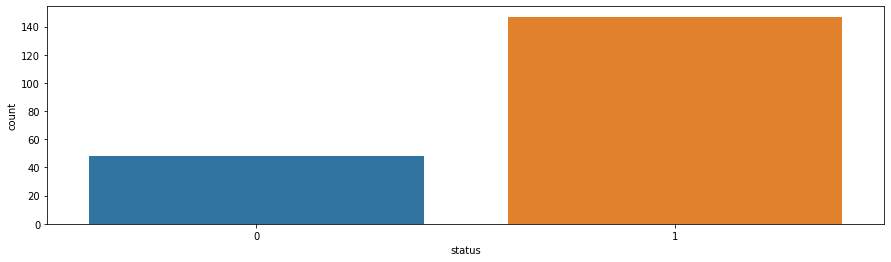

In [33]:
sns.countplot(x='status',data=df)
plt.show()

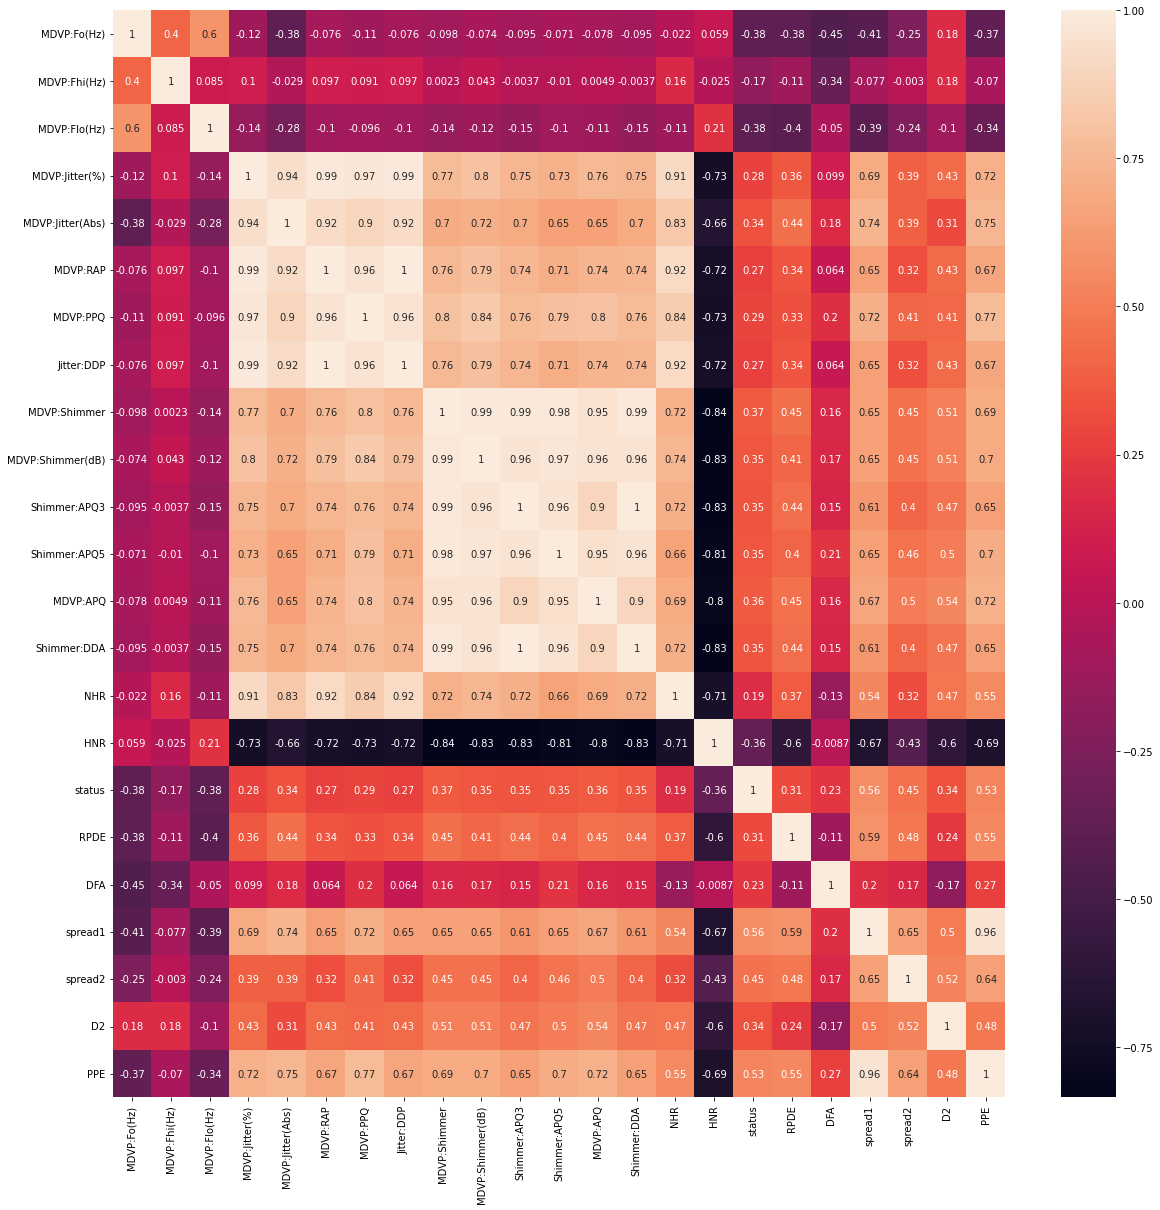

In [34]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show()

In this correlation heatmap, we can see that many independent features are highly correlated with eachother.

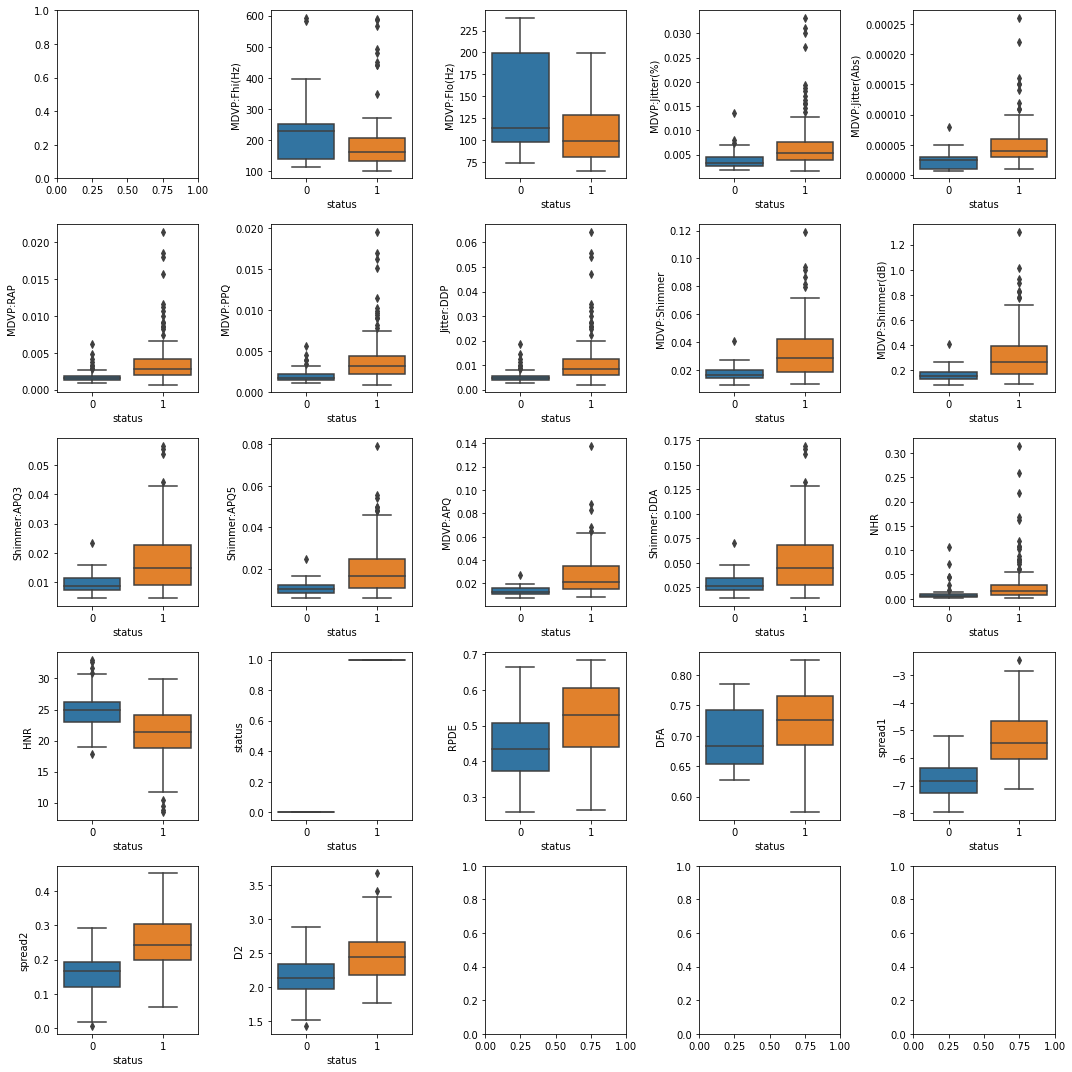

In [35]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

From the boxplot shown above it is very evident that if a patient has a lower rate of 'HNR','MDVP:Flo(Hz)','MDVP:Fhi(Hz)','MDVP:Fo(Hz)' ,then he/she is affected by parkinsons disease.

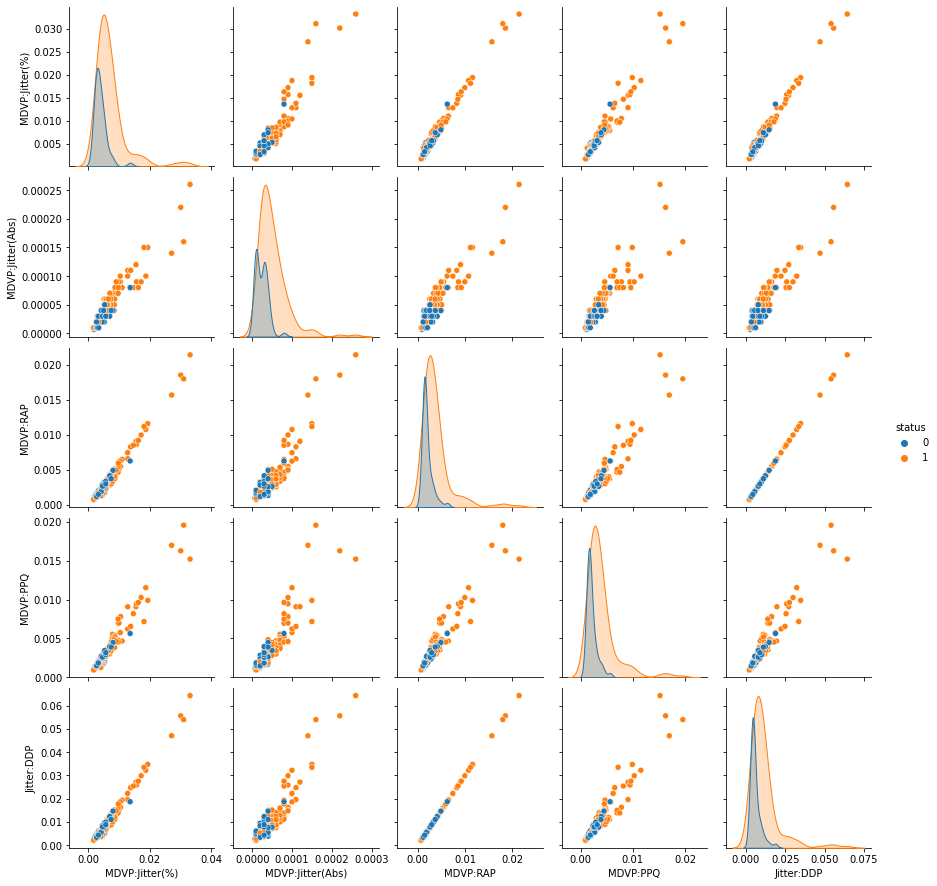

In [36]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()

From the above pair plot we can understand that all these fundamental frequencies are highly correlated with eachother.

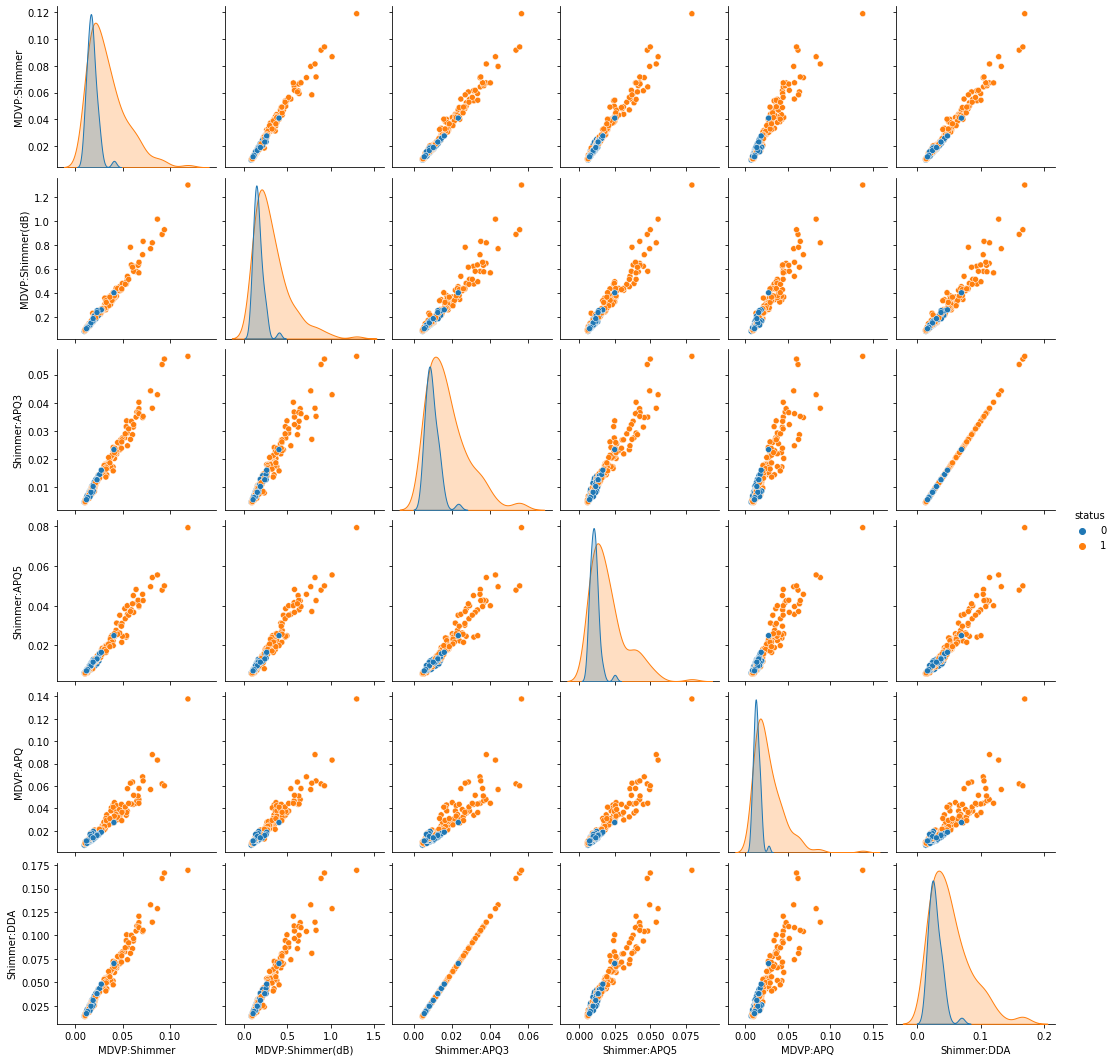

In [19]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()

From the above pair plot we can understand that all these measures variation in amplitude are highly correlated with eachother.



# Balancing Dataset
---
In this section, as it is observed that the Dataset Is Heavily Imbalanced, with Number of Samples of Parkinson Disease Samples being 147, and Non-Parkinson Being only 48. Hence, in this section, we make use of **SMOTE** to **Oversample** and Balance the dataset.

In [37]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [38]:
X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


In [39]:
sm = SMOTE(random_state=300)

In [40]:
X, y = sm.fit_resample(X, y)

In [41]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (294, 22)
Target (y) Shape After Balancing : (294,)


In [42]:
scaler = MinMaxScaler((-1,1))

In [43]:
X_features = scaler.fit_transform(X)
Y_labels = y

#Spliting the dataset into train and test data



In [44]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)

In [45]:
print("shape of X train :",X_train.shape)
print("shape of y train :",y_train.shape)
print("shape of X test :",X_test.shape)
print("shape of y test :",y_test.shape)

shape of X train : (235, 22)
shape of y train : (235,)
shape of X test : (59, 22)
shape of y test : (59,)


# Machine Learning Model Training
In this section, we have trained the following Machine Learning Models:
+ Decision Tree Classifier
+ KNN
+ SVM 

## Decision Tree Classifier

In [46]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)
predDTX = clf.predict(X_train)

print(classification_report(y_test, predDT))


              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.86      0.96      0.91        26

    accuracy                           0.92        59
   macro avg       0.91      0.92      0.91        59
weighted avg       0.92      0.92      0.92        59



In [47]:
print("accuracy score of training data :",accuracy_score(y_train,predDTX))
print("accuracy score of testing data :",accuracy_score(y_test,predDT))

accuracy score of training data : 1.0
accuracy score of testing data : 0.9152542372881356


optimizing decision tree

In [48]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(30,210,30),
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': range(30, 210, 30)})

In [49]:
CV_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'random_state': 120}

In [50]:
dt1=DecisionTreeClassifier(random_state=120, max_features='auto', max_depth=6, criterion='entropy')
dt1.fit(X_train, y_train)
predDT = dt1.predict(X_test) 
predDTX = clf.predict(X_train)

print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.96      0.88      0.92        26

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



In [51]:
print("accuracy score of training data :",accuracy_score(y_train,predDTX))
print("accuracy score of testing data :",accuracy_score(y_test,predDT))

accuracy score of training data : 1.0
accuracy score of testing data : 0.9322033898305084


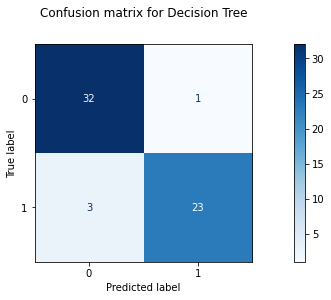

In [52]:
plot_confusion_matrix(dt1, X_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.show()

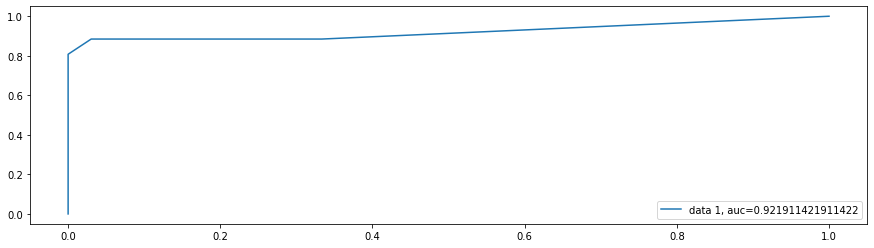

In [53]:
y_pred_proba = dt1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [54]:
joblib.dump(dt1, 'dt_clf.pkl')

['dt_clf.pkl']

## SVM

SVM With Linear Kernel

In [55]:
clf = svm.SVC(kernel='linear') 

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

X_pred = clf.predict(X_train)
print("Train Set Accuracy:",metrics.accuracy_score(y_train, X_pred))

Test Set Accuracy: 0.8135593220338984
Train Set Accuracy: 0.8638297872340426


In [56]:
param_grid = {'kernel':['linear','rbf','poly'],'C': [0.5, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_SVC = GridSearchCV(svm.SVC(), param_grid, scoring='f1', verbose = 3) 

In [57]:
grid_SVC.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.744 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.818 total time=   0.0s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.939 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.979 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.894 total time=   0.0s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1', verbose=3)

In [58]:
print("\nBest Parameters: ", grid_SVC.best_params_)

print("\n", grid_SVC.best_estimator_)

predSVC = grid_SVC.predict(X_test) 
predSVCX = grid_SVC.predict(X_train) 
  
print("\n", classification_report(y_test, predSVC))


Best Parameters:  {'C': 100, 'gamma': 1, 'kernel': 'rbf'}

 SVC(C=100, gamma=1)

               precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.92      0.96        26

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59



In [59]:
print("Test Set Accuracy:",metrics.accuracy_score(y_test, predSVC))

print("Train Set Accuracy:",metrics.accuracy_score(y_train, predSVCX))

Test Set Accuracy: 0.9661016949152542
Train Set Accuracy: 1.0


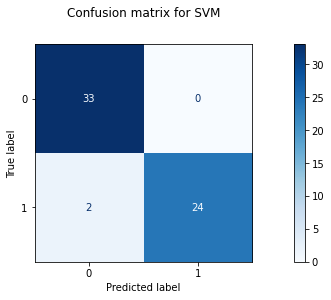

In [60]:
plot_confusion_matrix(grid_SVC, X_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for SVM', y=1.1)
plt.show()

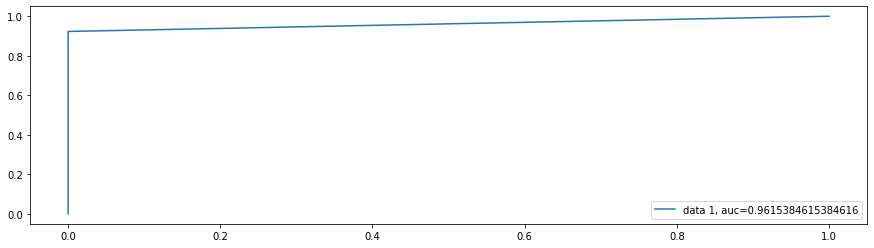

In [61]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predSVC)
auc = metrics.roc_auc_score(y_test, predSVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [62]:
joblib.dump(grid_SVC, 'svm_clf.pkl')

['svm_clf.pkl']

## KNN Classifier


In [63]:
Ks = 10
mean_acc = []
ConfustionMx = [];
for n in range(2,Ks):  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_test, yhat))  
print('Neighbor Accuracy List')
print(mean_acc)

Neighbor Accuracy List
[0.9491525423728814, 0.9661016949152542, 0.9661016949152542, 0.9661016949152542, 0.9152542372881356, 0.9152542372881356, 0.8983050847457628, 0.9152542372881356]


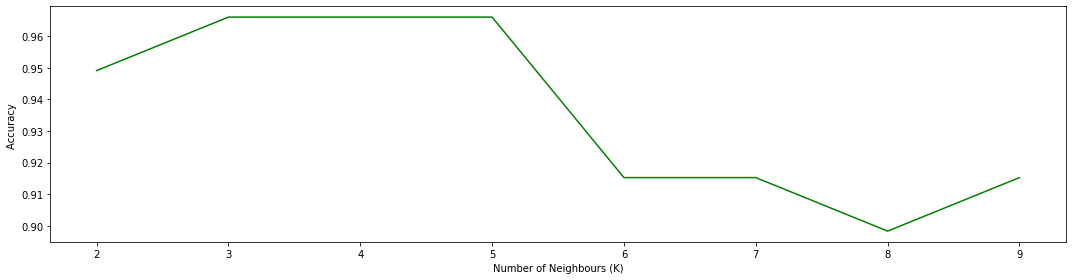

In [64]:
plt.plot(range(2,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [65]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predKNN = knn.predict(X_test)
predKNNX = knn.predict(X_train)

In [66]:
print("Test Set Accuracy:",metrics.accuracy_score(y_test, predKNN))

print("Train Set Accuracy:",metrics.accuracy_score(y_train, predKNNX))

Test Set Accuracy: 0.9661016949152542
Train Set Accuracy: 0.9531914893617022


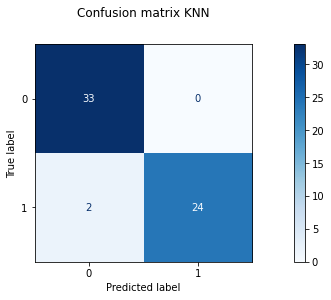

In [67]:
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix KNN', y=1.1)
plt.show()

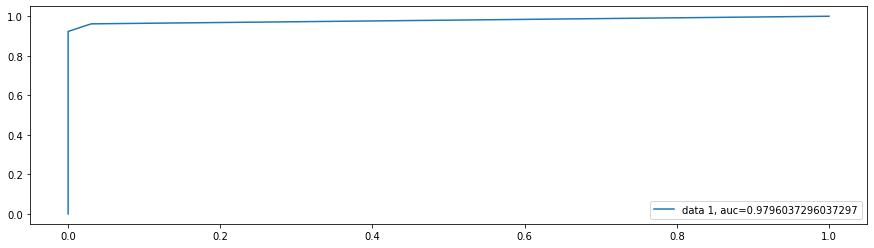

In [68]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [69]:
joblib.dump(knn, 'knn_clf.pkl')

['knn_clf.pkl']

# Model Evaluation and Comparison

> Indented block



In [70]:
chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
        'KNN':[accuracy_score(y_test, predKNN), f1_score(y_test, predKNN), recall_score(y_test, predKNN), precision_score(y_test, predKNN), r2_score(y_test, predKNN)]
}
chart = pd.DataFrame(chart)

In [71]:
display(chart)

,Metric,DT,SVM,KNN
0,Accuracy,0.932203,0.966102,0.966102
1,F1-Score,0.920000,0.960000,0.960000
2,Recall,0.884615,0.923077,0.923077
3,Precision,0.958333,1.000000,1.000000
4,R2-Score,0.724942,0.862471,0.862471


from the above comparison table it is evident that the accuracy of KNN and SVM is slightly better than that of decision tree

#Classifying and Annotating the input data

In [92]:
input_data = (116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.51700,0.02924,0.04005,0.03772,0.08771,0.01353,20.64400,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)


std_data=scaler.fit_transform(input_data_reshaped)


prediction=grid_SVC.predict(std_data)

if(prediction[0]==0):
  print("The person does not have parkinson's disease")
else:
  print("The person has parkinson's disease")
  flag=0
  if (input_data[0]<145.180762):
    flag=flag+1
  if (input_data[1]<188.441463):
    flag=flag+1
  if (input_data[2]<106.893558):
    flag=flag+1
  if (input_data[15]<20.974048):
    flag=flag+1
  

  if (flag==1):
    print(" Somewhat slow, but no help needed. ")
  elif (flag==2):
    print("Occasional assistance with buttoning, getting arms in sleeves. ")
  else:
    print("Considerable help required.")


The person has parkinson's disease
Considerable help required.
